In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [3]:
# train data 일부를 검증(val)세트로 만들어주기
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [4]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu',name='hidden')) # 'sigmoid'
model.add(keras.layers.Dropout(0.3))  # 30%를 제외시키는 규제적용
model.add(keras.layers.Dense(10,activation='softmax',name='output'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss,accuracy 값을 저장
# train_scaled, val_scaled를 함께 훈련 시킴
history = model.fit(train_scaled, train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7272 - loss: 0.7824 - val_accuracy: 0.8322 - val_loss: 0.4610
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8384 - loss: 0.4542 - val_accuracy: 0.8558 - val_loss: 0.3906
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8489 - loss: 0.4171 - val_accuracy: 0.8689 - val_loss: 0.3582
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8604 - loss: 0.3867 - val_accuracy: 0.8643 - val_loss: 0.3611
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8662 - loss: 0.3651 - val_accuracy: 0.8654 - val_loss: 0.3684
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8712 - loss: 0.3530 - val_accuracy: 0.8690 - val_loss: 0.3565
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8730 - loss: 0.3444 - val_accuracy: 0.8748 - val_loss: 0.3424
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8768 - loss: 0.3364 - 

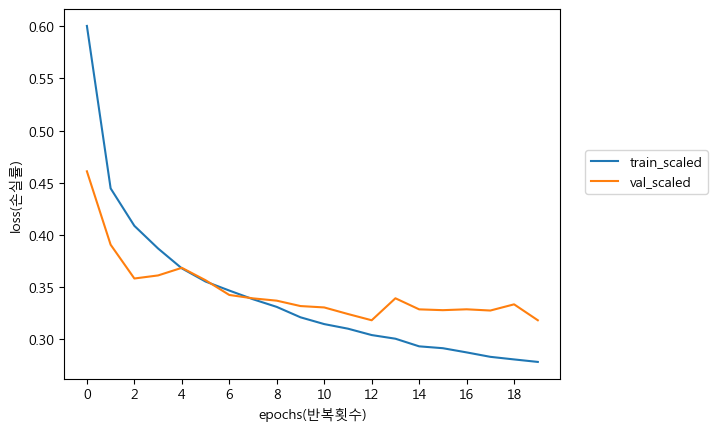

In [6]:
plt.plot(history.history['loss'],label='train_scaled')
plt.plot(history.history['val_loss'],label='val_scaled')
plt.xticks([i for i in range(0,20,2)])
plt.xlabel('epochs(반복횟수)')
plt.ylabel('loss(손실률)')
plt.legend(loc=(1.05,0.5))
plt.show()

콜백

In [9]:
# 손실률이 가장 낮은 값을 가지는 epochs 값 위치의 모델을 저장시켜준다
# 확장자 h5 -> keras 확장자명 변경
# epochs를 20번 돌 때 가장 좋은 모델을 뽑아줌
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9125 - loss: 0.2282 - val_accuracy: 0.8900 - val_loss: 0.3371
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9147 - loss: 0.2266 - val_accuracy: 0.8883 - val_loss: 0.3324
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9110 - loss: 0.2280 - val_accuracy: 0.8891 - val_loss: 0.3278
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9166 - loss: 0.2216 - val_accuracy: 0.8890 - val_loss: 0.3356
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9132 - loss: 0.2238 - val_accuracy: 0.8871 - val_loss: 0.3437
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9153 - loss: 0.2264 - val_accuracy: 0.8874 - val_loss: 0.3467
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9134 - loss: 0.2235 - val_accuracy: 0.8854 - val_loss: 0.3544
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9151 - loss: 0.2218 - 

In [10]:
model = keras.models.load_model('best_model.keras')
model.evaluate(val_scaled,val_target)

ValueError: A total of 1 objects could not be loaded. Example error message for object <keras.src.optimizers.adam.Adam object at 0x0000024218485AF0>:

'Unable to synchronously open object (bad object header version number)'

List of objects that could not be loaded:
[<keras.src.optimizers.adam.Adam object at 0x0000024218485AF0>]